### Paper
This work follows the method given in _"Truly unentangled photon pairs without spectral filtering"_ Vernon 2017


_Latex commands in this cell_
$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
$\newcommand{\braket}[2]{\left\langle{#1} \middle| {#2}\right\rangle}$
$\DeclareMathOperator{\Tr}{\text{Tr}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings('ignore')

### Purity of a hearalded state

The existance of a quantum state can be heralded by generating it as one of a bi-partite pair. A measurement of the second particle necessitates the existance of the first. However, bi-partite quantum states can show residual correlations, under which the information losing heralding measurement manfiests itself as decoherence in the heralded state.

Take the (maximally entangled!) Bell state:

$\ket{\Phi^+} = \frac{1}{\sqrt{2}}\left(\ket{00} + \ket{11} \right)$

with density matrix:
$\rho = \ket{\Phi^+}\bra{\Phi^+}=\frac{1}{2}\left(\ket{00}\bra{00}+\ket{00}\bra{11}+\ket{11}\bra{00}+\ket{11}\bra{11} \right)$

A heralding measurement on the second qubit is just a partial trace over this space, with the heralded state given by:

$\begin{equation*}
\begin{split}
\rho^a &= \Tr_b \rho = \sum_{j \in \left \{0,1 \right \}} \left( \mathbb{1}_a \otimes \bra{j}_b \right) \rho\left( \mathbb{1}_a \otimes \ket{j}_b \right) \\ &= \frac{1}{2}\left(\ket{0}\bra{0}+\ket{0}\bra{1}+\ket{1}\bra{0}+\ket{1}\bra{1} \right)
\end{split}
\end{equation*}$

whose off-diagonal elements imply a mixed state... The purity of which is given by:

$\begin{equation*}
\begin{split}
\gamma &= \Tr \left(\rho^a\right)^2 \\
&= \frac{1}{4}\sum_{i\in\{0,1\}} \bra{i} \left(\ket{0}\bra{0}+\ket{0}\bra{1}+\ket{1}\bra{0}+\ket{1}\bra{1} \right)\left(\ket{0}\bra{0}+\ket{0}\bra{1}+\ket{1}\bra{0}+\ket{1}\bra{1} \right) \ket{i} \\
&=\frac{1}{4}\sum_{i\in\{0,1\}} \bra{i} \left( \ket{0}\bra{0} +\ket{0}\bra{1} +\ket{1}\bra{0}+\ket{1}\bra{1} \right)  \ket{i} \text{as} \braket{n}{m} = \delta_{n,m} \\
\gamma&=\frac{1}{2} 
\end{split}
\end{equation*}$

which is the minimum purity ($\frac{1}{d}$) for a state in a 2-dimensional Hilbert space i.e. partial tracing a maximally entangled bi-partite state yields a minimally pure heralded state.

### Squeezed Vacuum State

Four-wave mixing in a resonator leads to a squeezed vacuum in the signal-idler modes, given by:

$\ket{\phi} = c_0 \ket{0,0} + \beta \ket{1,1} + \gamma \ket{2,2} + ...$

Where the first term is the vacuum term, the second term is the (desired) single photon pair state and subsequent terms are ignored for low power.

### Single Photon Pair State

<img src="modes.png" width=400 title="FWM Modes">

The above image shows the modes involved in the four-wave-mixing (FWM). A pump laser, of spectral shape $\alpha_P\left(\omega \right)$ pumps a resonator mode of shape $l_P\left(\omega \right)$. This leads to the generation of photon pairs in the signal and idler modes ($S$ and $L$), which have central frequencies $\omega_I$ ($I \in \{S,L\}$), a spectral shape $l_I\left(\omega_i \right)$ where $\omega_i (i \in \{s,i\})$ parametises these resonances as offsets from the central frequency.  

The single photon pair state is then given by:

$\ket{1,1} = \int d\omega_i d\omega_s \phi\left(\omega_i,\omega_s \right) \hat{a}^\dagger_I\left(\omega_i\right)\hat{a}^\dagger_S\left(\omega_s\right)\ket{0,0}$

where $\hat{a}^\dagger_I$ is the creation operatior for a photon in mode $I$.

The biphoton wavefunction $\phi\left(\omega_i,\omega_s \right)$ holds all information about the purity of the generated states, with perfect purity for a separable wavefunction $\phi\left(\omega_i,\omega_s \right) = \phi\left(\omega_i \right)\phi\left(\omega_s \right)$ i.e. with no remaining frequency entanglement in the signal-idler.

### Biphoton Wavefunction

$\phi\left(\omega_i, \omega_s \right) \propto F_P\left(\omega_i + \omega_s \right)l_S\left(\omega_s\right)l_I\left(\omega_i\right)$

where

$F_P\left(\omega\right) = \int d\omega_p \alpha_P\left(\omega_p\right)\alpha_P\left(\omega-\omega_p\right) l_P\left(\omega_p\right)l_P\left(\omega-\omega_p\right)$ 

is the term that leads to modal entanglement and is dependent on the pump spectrum.

### Purity of heralded state

The density matrix associated with the $\ket{1,1}$ state is:

$\begin{equation*}
\begin{split}
\rho &= \ket{1,1}\bra{1,1} \\
&= \int d \omega_I d\omega_{II} d\omega_{III} d\omega_{IV} \phi\left(\omega_I,\omega_{II} \right)\phi^*\left(\omega_{III},\omega_{IV} \right) \hat{a}^\dagger_I\left(\omega_I\right)\hat{a}^\dagger_S\left(\omega_{II}\right)\ket{0,0}\bra{0,0}\hat{a}_I\left(\omega_{III}\right)\hat{a}_S\left(\omega_{IV}\right)
\end{split}
\end{equation*}$

The heralded idler state upon measurement of a signal photon is given by the partial trace:


$\begin{equation*}
\begin{split}
\rho_I &= \Tr_S \rho \\
&= \int d \omega_s \bra{0,0}\left(\mathbb{1}_I\otimes\hat{a}_S\left(\omega_s \right) \right) \rho \left(\mathbb{1}_I\otimes\hat{a}^\dagger_S\left(\omega_s \right) \right) \ket{0,0} \\
&= \int d \omega_s d \omega_I d\omega_{II} d\omega_{III} d\omega_{IV} \phi\left(\omega_I,\omega_{II} \right)\phi^*\left(\omega_{III},\omega_{IV} \right) \bra{0}_S\left(\mathbb{1}_I\otimes\hat{a}_S\left(\omega_s \right) \right) \hat{a}^\dagger_I\left(\omega_I\right)\hat{a}^\dagger_S\left(\omega_{II}\right)\ket{0,0}\bra{0,0}\hat{a}_I\left(\omega_{III}\right)\hat{a}_S\left(\omega_{IV}\right) \left(\mathbb{1}_I\otimes\hat{a}^\dagger_S\left(\omega_s \right) \right) \ket{0}_S\\
&= \int d \omega_s d \omega_I d\omega_{II} d\omega_{III} d\omega_{IV} \phi\left(\omega_I,\omega_{II} \right)\phi^*\left(\omega_{III},\omega_{IV} \right) \hat{a}^\dagger_I\left(\omega_I\right)\ket{0}\bra{0}\hat{a}_I\left(\omega_{III}\right)  \delta\left(\omega_s - \omega_{II} \right) \delta\left(\omega_s - \omega_{IV} \right) \\
&= \int d \omega_s d \omega_I  d\omega_{III} \phi\left(\omega_I,\omega_s \right)\phi^*\left(\omega_{III},\omega_s \right)  \hat{a}^\dagger_I\left(\omega_I\right)\ket{0}\bra{0}\hat{a}_I\left(\omega_{III}\right) \\
&= \int d\omega_1 d\omega_{2} q_I\left(\omega_1, \omega_{2} \right) \hat{a}^\dagger_I\left(\omega_1\right)\ket{0}\bra{0}\hat{a}_I\left(\omega_2\right)
\end{split}
\end{equation*}$

where:

$q_I\left(\omega_1, \omega_{2} \right) = \int d\omega_s \phi\left(\omega_1,\omega_s \right)\phi^*\left(\omega_{2},\omega_s \right)$

Now the purity of this state is found as the trace of the density matrix squared:

$\begin{equation*}
\begin{split}
\gamma &= \Tr \left(\rho_I\right)^2 \\
&= \int d\omega_i \bra{0} \hat{a}\left(\omega_i\right) \left(\rho_I\right)^2 \hat{a}^\dagger\left(\omega_i\right) \ket{0}\\
&= \int d\omega_i d\omega_{1,2,3,4} q_I\left(\omega_1, \omega_{2} \right)q_I\left(\omega_3, \omega_{4} \right)\bra{0} \hat{a}\left(\omega_i\right) \hat{a}^\dagger_I\left(\omega_1\right)\ket{0}\bra{0}\hat{a}_I\left(\omega_2\right)\hat{a}^\dagger_I\left(\omega_3\right)\ket{0}\bra{0}\hat{a}_I\left(\omega_4\right) \hat{a}^\dagger\left(\omega_i\right) \ket{0} \\
&= \int d\omega_i d\omega_{1,2,3,4} q_I\left(\omega_1, \omega_{2} \right)q_I\left(\omega_3, \omega_{4} \right) \delta \left(\omega_i - \omega_1 \right) \delta \left(\omega_i - \omega_4 \right) \delta \left(\omega_2 - \omega_3 \right)\\
&= \int d\omega_{1,2} q_I\left(\omega_1, \omega_{2} \right)q_I\left(\omega_2, \omega_{1} \right)\\
\gamma&= \int d\omega_{1,2} \left|q_I\left(\omega_1, \omega_{2} \right)\right|^2
\end{split}
\end{equation*}$

as

$q_I\left(\omega_1, \omega_{2} \right) = q^*_I\left(\omega_2, \omega_{1} \right)$

In [2]:
class Distribution:
    def __init__(self,
                dtype = 'Lorentzian',
                linewidth = 1.0,
                col = 'k'):
        """
        This object gives a distribution (either Lorentzian or Gaussian [thus far]) which can be subsequently 
        called to give the respective amplitude at specified frequencies
        """
        self.dtype = dtype # Type of distribution
        self.lw = linewidth # Width of the distribution
        self.col = col # Colour to be plotted
    def getAmp(self,
              omega = 0.0):
        """
        This function returns the value of the distribution at a given frequency
        """
        amp = None
        if self.dtype == 'Lorentzian':
            amp = (self.lw/(2*np.pi))**0.5 *1/(1.0j*omega+0.5*self.lw)
        elif self.dtype == 'Gaussian':
            amp = (1/(self.lw*(2*np.pi)**0.5))*np.exp(-0.5*(omega/self.lw)**2)
        else:
            print('Distribution of type: {} is not defined'.format(self.dtype))
        
        return amp

In [3]:
class Resonator:
    def __init__(self,
                pModeLw = 1.0,
                sModeLw = 1.0,
                iModeLw = 1.0,
                pType = 'Gaussian',
                pLw = 1):
        """
        This object gives the parameters required to calculate the spectral purity of photons made from spontaneous
        four-wave-mixing of two photons into a signal and idler pair. The pumped mode, along with the signal and 
        idler modes are assumed to be Lorentzian, with linewidths given by the user. The pump laser can have any
        distribution.
        """
        self.pMode = Distribution(dtype = 'Lorentzian', linewidth = pModeLw, col='k')
        self.sMode = Distribution(dtype = 'Lorentzian', linewidth = sModeLw, col='r')
        self.iMode = Distribution(dtype = 'Lorentzian', linewidth = iModeLw, col='b')
        self.pump = Distribution(dtype=pType, linewidth = pLw, col = 'g')
        
    def getWavefunction(self, omega_i = 0.0, omega_s = 0.0):
        """
        This function gives the biphoton wavefunction value for omega_i and omega_s. Eq. 3 of paper.
        """
        F_P = self.getFP(omega_i+omega_s)
        wavefunctionValue = F_P * self.sMode.getAmp(omega_s) * self.iMode.getAmp(omega_i)
        return wavefunctionValue
    
    def getFP(self,omega=0.0):
        """
        This function solution to the coherent sum of all energy conserving amplitudes. Eq. 4 of paper.
        """
        omega_p_min = -10
        omega_p_max = 10
        N = 100
        omega_ps = np.linspace(omega_p_min,omega_p_max,N) # Integration variable/domain
        integrand = [self.pump.getAmp(omega_p)*
                     self.pump.getAmp(omega - omega_p)*
                     self.pMode.getAmp(omega_p)*
                     self.pMode.getAmp(omega - omega_p)
                     for omega_p in omega_ps] # Integrand of equation
        F_P = (np.trapz(np.real(integrand), x=omega_ps) +
               1.0j*np.trapz(np.imag(integrand), x=omega_ps)) # Value of integration
        return F_P



Calculating wavefunction: |░░░░░░░░░░░░░░░░░░░-| 99.5%

Calculating purity: 99.5% complete
Purity: 33.74537073531963%


Calculating wavefunction: |░░░░░░░░░░░░░░░░░░░-| 99.5%

Calculating purity: 99.5% complete
Purity: 82.05854361581773%


Calculating wavefunction: |░░░░░░░░░░░░░░░░░░░-| 99.5%

Calculating purity: 99.5% complete
Purity: 94.17628508322882%


Calculating wavefunction: |░░░░░░░░░░░░░░░░░░░-| 99.5%

Calculating purity: 99.5% complete
Purity: 100.08343118357332%


Calculating wavefunction: |░░░░░░░░░░░░░░░░░░░-| 99.5%

Calculating purity: 99.5% complete
Purity: 100.83835017998143%


Calculating wavefunction: |░░░░░░░░░░░░░░░░░░░-| 99.5%

Calculating purity: 99.5% complete
Purity: 100.89878444108766%


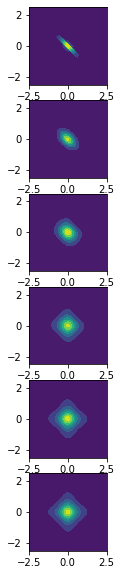

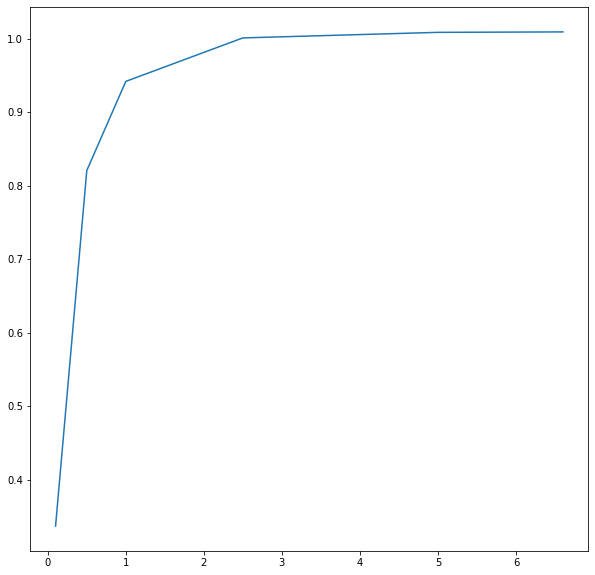

In [19]:
pModeLWs = np.array([0.1,0.5,1,2.5,5,6.6])
purities = np.empty((len(pModeLWs)),dtype=float)
purities[:] = np.nan
fig = plt.figure(figsize=(10,10))

fig2 = plt.figure(figsize = (10,10))
axF2 = fig2.add_subplot(111)

for I in range(len(pModeLWs)):
    x = Resonator(pLw = 20, pModeLw = pModeLWs[I])
    omega_min = -2.5
    omega_max = 2.5
    N = 200
    dA = ((omega_max-omega_min)/N)**2
    omega_s_s = np.linspace(omega_min, omega_max, N)
    omega_i_s = np.linspace(omega_min, omega_max, N)

    omega_s_s, omega_i_s = np.meshgrid(omega_s_s, omega_i_s)
    waveAmplitude = np.empty((N,N),dtype=complex)
    waveAmplitude[:] = np.NaN
    waveFunction = np.empty((N,N))
    waveFunction[:] = np.NaN

    nProgress = 20
    print('\n')
    for i in range(N):
        print('Calculating wavefunction: |{}| {}%'.format(int(i*nProgress/N)*'░'+(nProgress-int(nProgress*i/N))*'-',
                                                          100*i/N),end="\r")
        for j in range(N):
            omega_s = omega_s_s[i,j]
            omega_i = omega_i_s[i,j]
            waveAmplitude[i,j] = x.getWavefunction(omega_i = omega_i, omega_s = omega_s)
            waveFunction[i,j] = abs(waveAmplitude[i,j])**2
    
    normalisationFactor = 0.0
    for i in range(N-1):
        for j in range(N-1):
            height = np.sum(np.sum(waveFunction[i:i+1][j:j+1]))/4
            normalisationFactor += dA*height
    normalisationFactor *= 2
    waveFunction /= normalisationFactor
    waveAmplitude /= normalisationFactor**0.5
    
    q_i = np.empty((N,N),dtype = complex)
    q_i[:] = np.NaN
    Q_i = np.empty((N,N))
    Q_i[:] = np.NaN
    print('\n')
    purity = 0.0
    for i in range(N):
        print('Calculating purity: {}% complete'.format(100*i/N),end="\r")
        for j in range(N):
            integrand = [waveAmplitude[ii,i]*np.conj(waveAmplitude[ii,j]) for ii in range(N)]
            q_i[i,j] = np.trapz(integrand,x=np.linspace(omega_min,omega_max,N))
            Q_i[i,j] = np.abs(q_i[i,j])**2
            
    for i in range(N-1):
        for j in range(N-1):
            height = np.sum(np.sum(Q_i[i:i+1][j:j+1]))/4
            purity += height*dA
            
    print('\nPurity: {}%'.format(purity*100))
    purities[I] = purity
    ax = fig.add_subplot(len(pModeLWs),1,I+1)
    plot = ax.contourf(omega_s_s,omega_i_s,waveFunction)
    ax.set_aspect('equal')

axF2.plot(pModeLWs,purities)

# Possible work
We can work on adding:
 - Higher power, i.e. a squeeezed vacuum state rather than the simple single photon pair state.
 - Adding nonlinearities/dispersion into the work. This will let us look at the double peaked spectra.